In [2]:
import torch
import numpy as np
import pandas as pd

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline  
torch.__version__

'1.10.1'

In [3]:
def plotVec(vectors):
    ax = plt.axes()
    
    # For loop to draw the vectors
    for vec in vectors:
        ax.arrow(0, 0, *vec["vector"], head_width = 0.05,color = vec["color"], head_length = 0.1)
        plt.text(*(vec["vector"] + 0.1), vec["name"])
    
    plt.ylim(-2,2)
    plt.xlim(-2,2)

In [4]:
v = torch.FloatTensor([1,2,3,4,5])
v

tensor([1., 2., 3., 4., 5.])

In [5]:
v.ndimension()

1

In [6]:
v.size()

torch.Size([5])

In [7]:
v2 = v.view(5,1) # torch's reshape method
v2

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])

In [8]:
v2.ndimension()

2

In [9]:
v2.size()

torch.Size([5, 1])

In [10]:
#reshape dynamic size
v2_new = v.view(-1,1)
v2_new

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])

In [11]:
v2_new.ndimension()

2

In [12]:
v2.size()

torch.Size([5, 1])

In [17]:
arr = np.array([0,1,2,3,4,5]) 
t1 = torch.from_numpy(arr) # points to the numpy array
t1

tensor([0, 1, 2, 3, 4, 5])

In [18]:
back_to_numpy = t1.numpy()

In [19]:
arr[:] = 0
print("The new tensor points to numpy_array : ", t1)

The new tensor points to numpy_array :  tensor([0, 0, 0, 0, 0, 0])


In [22]:
yt = torch.tensor([1,2,3,4,5])
yt = yt.view(1,5)
yt

tensor([[1, 2, 3, 4, 5]])

In [23]:
t2 = torch.tensor([1,2,3,4,5,6])
t2[3:5] = torch.tensor([300,500])
t2

tensor([  1,   2,   3, 300, 500,   6])

In [24]:
t2[:] = 5
t2

tensor([5, 5, 5, 5, 5, 5])

## Tensor Functions

In [25]:
mt = torch.tensor([1.0, -1.0, 1, -1])

In [26]:
mean = mt.mean()
mean

tensor(0.)

In [27]:
stddev = mt.std()
stddev

tensor(1.1547)

In [28]:
mt.max()

tensor(1.)

In [29]:
mt.min()

tensor(-1.)

In [31]:
sin = torch.sin(mt)
sin

tensor([ 0.8415, -0.8415,  0.8415, -0.8415])

In [34]:
t3 = torch.linspace(-2, 2, steps=10)
t3

tensor([-2.0000, -1.5556, -1.1111, -0.6667, -0.2222,  0.2222,  0.6667,  1.1111,
         1.5556,  2.0000])

In [38]:
pi_tensor = torch.linspace(0, 2*np.pi, 100)
sin_tensor = torch.sin(pi_tensor)
pi_tensor

tensor([0.0000, 0.0635, 0.1269, 0.1904, 0.2539, 0.3173, 0.3808, 0.4443, 0.5077,
        0.5712, 0.6347, 0.6981, 0.7616, 0.8251, 0.8885, 0.9520, 1.0155, 1.0789,
        1.1424, 1.2059, 1.2693, 1.3328, 1.3963, 1.4597, 1.5232, 1.5867, 1.6501,
        1.7136, 1.7771, 1.8405, 1.9040, 1.9675, 2.0309, 2.0944, 2.1579, 2.2213,
        2.2848, 2.3483, 2.4117, 2.4752, 2.5387, 2.6021, 2.6656, 2.7291, 2.7925,
        2.8560, 2.9195, 2.9829, 3.0464, 3.1099, 3.1733, 3.2368, 3.3003, 3.3637,
        3.4272, 3.4907, 3.5541, 3.6176, 3.6811, 3.7445, 3.8080, 3.8715, 3.9349,
        3.9984, 4.0619, 4.1253, 4.1888, 4.2523, 4.3157, 4.3792, 4.4427, 4.5061,
        4.5696, 4.6331, 4.6965, 4.7600, 4.8235, 4.8869, 4.9504, 5.0139, 5.0773,
        5.1408, 5.2043, 5.2677, 5.3312, 5.3947, 5.4581, 5.5216, 5.5851, 5.6485,
        5.7120, 5.7755, 5.8389, 5.9024, 5.9659, 6.0293, 6.0928, 6.1563, 6.2197,
        6.2832])

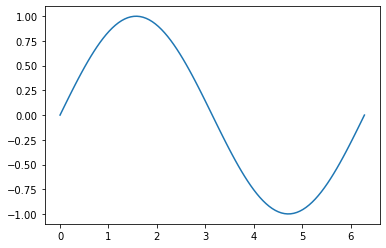

In [39]:
plt.plot(pi_tensor.numpy(), sin_tensor.numpy())

In [51]:
u = torch.tensor([[1,0], [2,2]])
v= torch.tensor([[3,4],[0,0]])
w = u + v
w

tensor([[4, 4],
        [2, 2]])

In [52]:
w2 = u -v
w2

tensor([[-2, -4],
        [ 2,  2]])

In [53]:
w3 = u + 1
w3

tensor([[2, 1],
        [3, 3]])

In [54]:
w4 = u * 3
w4

tensor([[3, 0],
        [6, 6]])

In [57]:
u1 , v1 = torch.tensor([1,2]), torch.tensor([2,3])
torch.dot(u1, v1) # 1D only

tensor(8)

## Differentiation

In [3]:
x = torch.tensor(2.0, requires_grad=True)
y = x ** 2
y.backward() # creates a function 'tree' graph that evaluates chained derivatives
x.grad 

tensor(4.)

Determine the derivative of $ y = 2x^3+x $ at $x=1$

In [4]:
x = torch.tensor(1.0, requires_grad=True)
y = 2*(x**3) + x
y.backward()
x.grad

tensor(7.)

# Custom Auto Gradient Functions

In [5]:
class SQ(torch.autograd.Function):
    

    @staticmethod
    def forward(ctx,i):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        result=i**2
        ctx.save_for_backward(i)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        i, = ctx.saved_tensors
        grad_output = 2*i
        return grad_output

In [6]:
x = torch.tensor(2.0, requires_grad=True)
sq = SQ.apply

y = sq(x)
y

tensor(4., grad_fn=<SQBackward>)

In [7]:
y.backward()
x.grad

tensor(4.)

In [11]:
u = torch.tensor(1.0,requires_grad=True)
v = torch.tensor(2.0,requires_grad=True)
f = u * v + u ** 2
f

tensor(3., grad_fn=<AddBackward0>)

In [12]:
f.backward()
u.grad

tensor(4.)

In [14]:
v.grad

tensor(1.)

# Calculate derivative with respect to multiple values

In [19]:
x = torch.linspace(-10, 10, 10, requires_grad = True)
Y = x ** 2
y = torch.sum(x ** 2)

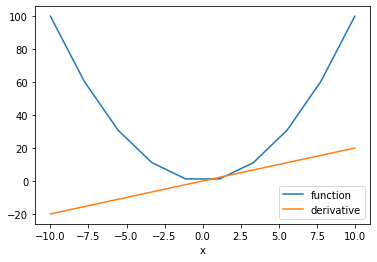

In [20]:
y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

# Datasets in PyTorch

Create a wrapper class for tensor data that can yield transforms on `__getitem__`

In [21]:
from torch.utils.data import Dataset
torch.manual_seed(1)

In [22]:
class toy_set(Dataset):

    def __init__(self, length = 100, transform = None):
        self.len = length
        self.x = 2*torch.ones(length, 1)
        self.y = torch.ones(length, 1)
        self.transform = transform
    
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)
        return sample
    
    def __len__(self):
        return self.len

In [23]:
ds = toy_set()
ds[0]

(tensor([2.]), tensor([1.]))

# Transforms

Transform the data

In [24]:
class add_mult(object):

    def __init__(self, addx = 1, muly = 2):
        self.addx = addx
        self.muly = muly
    
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x + self.addx
        y = y*self.muly
        sample = x,y
        return sample
    


In [25]:
am = add_mult()
ds = toy_set(transform= am)

for i in range(10):
    x, y = ds[i]
    print(x,y)


tensor([3.]) tensor([2.])
tensor([3.]) tensor([2.])
tensor([3.]) tensor([2.])
tensor([3.]) tensor([2.])
tensor([3.]) tensor([2.])
tensor([3.]) tensor([2.])
tensor([3.]) tensor([2.])
tensor([3.]) tensor([2.])
tensor([3.]) tensor([2.])
tensor([3.]) tensor([2.])


# Compose

In [26]:
!pip install torchvision

     |████████████████████████████████| 1.2 MB 10.0 MB/s            


In [27]:
from torchvision import transforms

In [29]:
class mult(object):
    def __init__(self, mult = 100):
        self.mult = mult
    
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x * self.mult
        y = y * self.mult
        sample = x,y
    
        return sample

In [30]:
data_transform = transforms.Compose([add_mult(), mult()])

In [31]:
data_transform(ds[0])

(tensor([400.]), tensor([400.]))